In [ ]:
!pip install monai

In [ ]:
!pip install glob2

In [ ]:
import os
from glob import glob
from tqdm.notebook import tqdm

#Folder Management 

In [ ]:
data_dir = "C:/Users/RAZER/Downloads/dataset/Task09_Spleen/Task09_Spleen"

train_images = sorted(glob(os.path.join(data_dir, 'imagesTr' ,"*.nii.gz")))
test_images = sorted(glob(os.path.join(data_dir, 'imagesTs',"*.nii.gz")))

train_labels = sorted(glob(os.path.join(data_dir, 'labelsTr',"*.nii.gz")))
test_labels = sorted(glob(os.path.join(data_dir, 'labelsTs',"*.nii.gz")))

#Making a list of dictionary where each dictionary will have single set of image and label

In [ ]:


def train_test_list(images,labels):
    f=[]
    if len(images)!=len(labels):
        return "Invalid Length"
    
    for i in tqdm(range(len(images))):
                   d = {'image': images[i],"label":labels[i]}
                   f.append(d)
    return f


def check_train_test_list(files):
    for i in tqdm(files):
        img = os.path.basename(os.path.normpath(i['image']))
        lab = os.path.basename(os.path.normpath(i['label'])) 
        if img==lab:
            print('OK')
        else:
            print("Not OK", i)
            break


In [ ]:
train_files = train_test_list(train_images,train_labels)
               
                
test_files = train_test_list(test_images,test_labels)


check_train_test_list(train_files)
check_train_test_list(test_files)

In [ ]:
print(train_files)
print(test_files)

In [ ]:
#train_files = [{'image': image_name, 'label':label_name} for image_name,label_name in zip(train_images,train_labels)]

#Compose 

In [84]:
import torch
from monai.transforms import (
    
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd,
    ScaleIntensityRanged,         #changing the contast (only for images, not for label)
    Resized,
    CropForegroundd,

)# if dictionary is being used, then an additional 'd' must be add after the funciton name


from monai.data import Dataset, DataLoader       #dataset loader or preview images from dataset
from monai.utils import first
import matplotlib.pyplot as plt

In [85]:
#load the images
#any transforms
#need to convert them into torch tensor

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        
        ToTensord(keys=['image','label']),

        
        
    ]


)


train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image','label']),   
    ]


)

test_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image','label']),
    ]


)

In [51]:
#transforming all training and testing datset

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [52]:
t_patient = first(train_loader) #selecting the frist patient
print(test_patient['image'])

tensor([[[[[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],

          [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           ...,
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]],

          [[-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
           [-1024., -1024.

In [55]:
print(torch.min(t_patient['image']))
print(torch.max(t_patient['image']))

tensor(-1024.)
tensor(1338.)


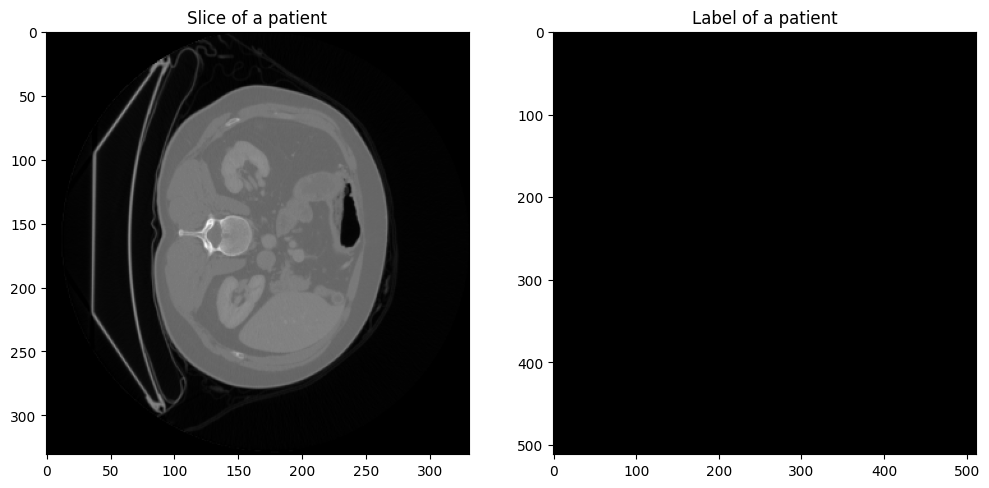

In [56]:
plt.figure('test',(12,6))
plt.subplot(1,2,1)
plt.title("Slice of a patient")
plt.imshow(test_patient['image'][0,0,:,:,39], cmap = 'gray') #[][batch size(the item),channel(0-> signle channle (forground/background), 
                                                                                            #1-> multiple channel(forground+background)),
                                                                                            #width,height,slice ]


plt.subplot(1,2,2)
plt.title("Label of a patient")
plt.imshow(t_patient['label'][0,0,:,:,39],cmap = 'gray') 
plt.show()

#Lets resize the images into same dimensions 

In [91]:
#load the images
#any transforms
#need to convert them into torch tensor




post_train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys = ['image', 'label'], pixdim = (1.5, 1.5, 2)), #(height,width,depth) for resize the
        ScaleIntensityRanged(keys = 'image', a_min = -200, a_max = 200, b_min = 0.0, b_max=1.0, clip = True),   # handeling conterest -> itk inter worlspace -> color map
        CropForegroundd(keys = ['image','label'], source_key="image"),         # remove un used potion or background
        Resized(keys = ['image','label'], spatial_size =[128,128,2]),
        ToTensord(keys=['image','label']),
        
    ]


)

post_test_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys = ['image', 'label'], pixdim = (1.5, 1.5, 2)), #(height,width,depth) for resize the
        ScaleIntensityRanged(keys = 'image', a_min = -200, a_max = 200, b_min = 0.0, b_max=1.0, clip = True),
        CropForegroundd(keys = ['image','label'], source_key="image"),         # remove un used potion or background
        Resized(keys = ['image','label'], spatial_size = [128,128,200]),       #resize after cropping
        ToTensord(keys=['image','label']),  
    ]


)

In [92]:
train_ds = Dataset(data=train_files, transform=post_train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

test_ds = Dataset(data=test_files, transform=post_test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [93]:
t_patient = first(train_loader) #selecting the frist patient


=== Transform input info -- Resized ===
image statistics:
Type: <class 'numpy.ndarray'>
Shape: (1, 280, 232, 111)
Value range: (0.0, 1.0)
label statistics:
Type: <class 'numpy.ndarray'>
Shape: (1, 280, 232, 111)
Value range: (0.0, 1.0)
image_meta_dict statistics:
Type: <class 'dict'>
Value: {'sizeof_hdr': array(348), 'extents': array(0), 'session_error': array(0, dtype=int16), 'dim_info': array(0, dtype=uint8), 'dim': array([  3, 512, 512, 148,   1,   1,   1,   1], dtype=int16), 'intent_p1': array(0., dtype=float32), 'intent_p2': array(0., dtype=float32), 'intent_p3': array(0., dtype=float32), 'intent_code': array(0, dtype=int16), 'datatype': array(16, dtype=int16), 'bitpix': array(32, dtype=int16), 'slice_start': array(0, dtype=int16), 'pixdim': array([1.     , 0.96875, 0.96875, 1.5    , 0.     , 0.     , 0.     ,
       0.     ], dtype=float32), 'vox_offset': array(0., dtype=float32), 'scl_slope': array(nan, dtype=float32), 'scl_inter': array(nan, dtype=float32), 'slice_end': array(

RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x0000021FE5506310>

In [89]:
print(torch.min(t_patient['image']))
print(torch.max(t_patient['image']))

tensor(0.)
tensor(1.)


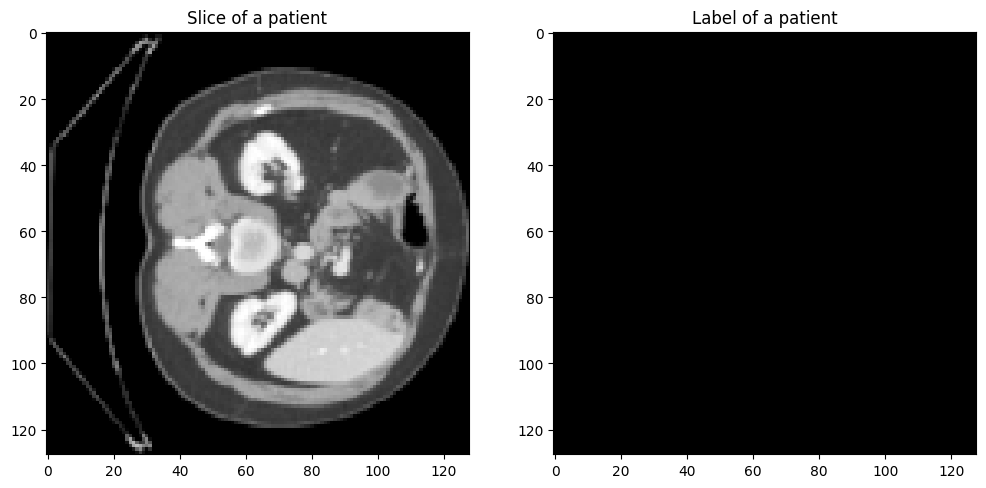

In [90]:
plt.figure('test',(12,6))
plt.subplot(1,2,1)
plt.title("Slice of a patient")
plt.imshow(t_patient['image'][0,0,:,:,39], cmap = 'gray') #[][batch size(the item),channel(0-> signle channle (forground/background), 
                                                                                            #1-> multiple channel(forground+background)),
                                                                                            #width,height,slice ]


plt.subplot(1,2,2)
plt.title("Label of a patient")
plt.imshow(t_patient['label'][0,0,:,:,39],cmap = 'gray') 
plt.show()